<a href="https://colab.research.google.com/github/zacharyvunguyen/End-to-End-Heart-Disease-Classification/blob/main/Final_Heart_Disease_Classification_with_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
dt = pd.read_csv('/content/drive/MyDrive/0_data_science/heart_disease/heart_statlog_cleveland_hungary_final.csv')

In [3]:
#dataset first 5 rows:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



### Converting features to categorical features 






#### `chest_pain_type` 

      * 1 typical
      * 2 typical angina 
      * 3 non- anginal pain
      * 4 asymptomatic (Nominal)

In [6]:
dt['chest_pain_type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest_pain_type, dtype: int64

In [7]:
dt['chest_pain_type'] = dt['chest_pain_type'].map({1: 'typical', 2: 'typical_angina', 3: 'non_anginal_pain',4: 'asymptomatic'})
dt['chest_pain_type'].value_counts()

asymptomatic        625
non_anginal_pain    283
typical_angina      216
typical              66
Name: chest_pain_type, dtype: int64

#### `rest_ecg` 
      *   0: Normal
      *   1: ST-T wave *abnormality*
      *   2: Left ventricular hypertrophy




In [8]:
dt['rest_ecg'].value_counts()

0    684
2    325
1    181
Name: rest_ecg, dtype: int64

In [9]:
dt['rest_ecg'] = dt['rest_ecg'].map({0: 'normal', 1: 'st_t_wave_abnormality', 2: 'left_ventricular_hypertrophy'})

In [10]:
dt['rest_ecg'].value_counts()

normal                          684
left_ventricular_hypertrophy    325
st_t_wave_abnormality           181
Name: rest_ecg, dtype: int64

#### `st_slope` column
      * 0 : Normal
      * 1: Unsloping
      * 2: Flat
      * 3: Downsloping

In [11]:
dt['st_slope'].value_counts()

2    582
1    526
3     81
0      1
Name: st_slope, dtype: int64

In [12]:
dt['st_slope'] = dt['st_slope'].map({0: 'normal', 1: 'upsloping', 2: 'flat', 3:'downsloping'})

In [13]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
normal           1
Name: st_slope, dtype: int64

In [14]:
#dropping row with st_slope =normal
dt.drop(dt[dt.st_slope =='normal'].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

#### `sex` column
      * 0: Female
      * 1: Male

In [15]:
dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [16]:
dt["sex"].value_counts()

male      908
female    281
Name: sex, dtype: int64

In [17]:
# checking the top 5 entries of dataset after feature encoding
dt.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,typical_angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non_anginal_pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,typical_angina,130,283,0,st_t_wave_abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non_anginal_pain,150,195,0,normal,122,0,0.0,upsloping,0
5,39,male,non_anginal_pain,120,339,0,normal,170,0,0.0,upsloping,0
6,45,female,typical_angina,130,237,0,normal,170,0,0.0,upsloping,0
7,54,male,typical_angina,110,208,0,normal,142,0,0.0,upsloping,0
8,37,male,asymptomatic,140,207,0,normal,130,1,1.5,flat,1
9,48,female,typical_angina,120,284,0,normal,120,0,0.0,upsloping,0


In [18]:
#dt.to_csv('/content/drive/MyDrive/0_data_science/heart_disease/encoded_dt.csv')

### Checking missing values:

In [19]:
## Checking missing entries in the dataset columnwise
dt.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

## 5. Exploratory Data Analysis (EDA)

In [20]:
# first checking the shape of the dataset
dt.shape

(1189, 12)

There are total 1189 records and 11 features with 1 target variable. <br>Lets check the summary of numerical and categorical features.

In [21]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                    object
target                       int64
dtype: object

In [22]:
# summary statistics of numerical columns
dt.describe(include =[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
age,1189.0,53.708158,9.352961,28.0,47.0,54.0,60.0,77.0
resting_blood_pressure,1189.0,132.138772,18.369251,0.0,120.0,130.0,140.0,200.0
cholesterol,1189.0,210.376787,101.462185,0.0,188.0,229.0,270.0,603.0
fasting_blood_sugar,1189.0,0.212784,0.409448,0.0,0.0,0.0,0.0,1.0
max_heart_rate_achieved,1189.0,139.739277,25.527386,60.0,121.0,141.0,160.0,202.0
exercise_induced_angina,1189.0,0.387721,0.487435,0.0,0.0,0.0,1.0,1.0
st_depression,1189.0,0.923549,1.086464,-2.6,0.0,0.6,1.6,6.2
target,1189.0,0.528175,0.499416,0.0,0.0,1.0,1.0,1.0


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [23]:
# summary statistics of categorical columns
dt.describe(include =[np.object]).transpose()

,count,unique,top,freq
sex,1189,2,male,908
chest_pain_type,1189,4,asymptomatic,625
rest_ecg,1189,3,normal,683
st_slope,1189,3,flat,582


### Distribution of Heart disease (target variable)

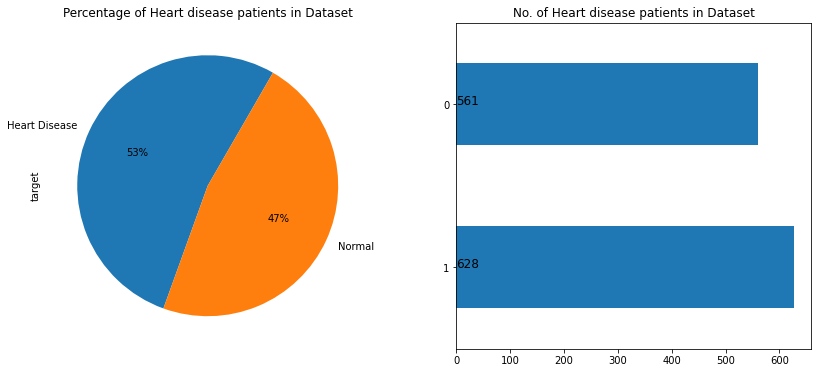

In [24]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

### Checking Gender & Agewise Distribution

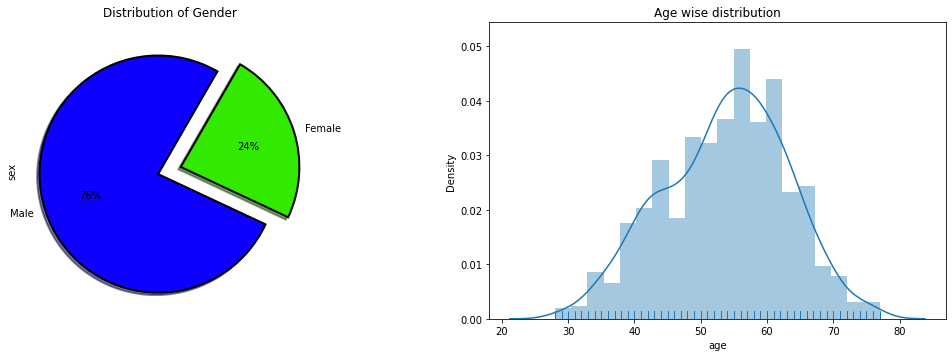

In [25]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

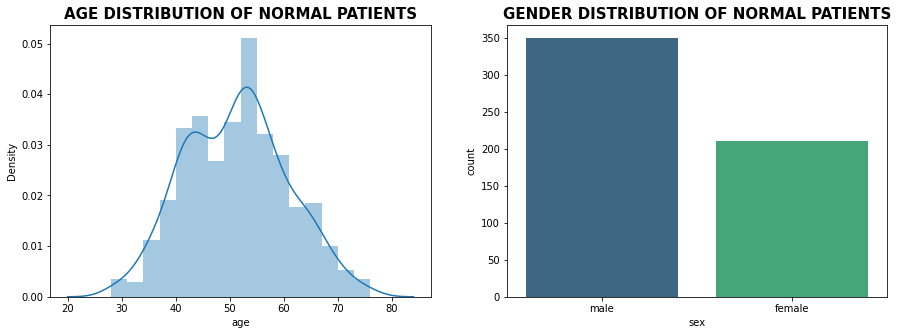

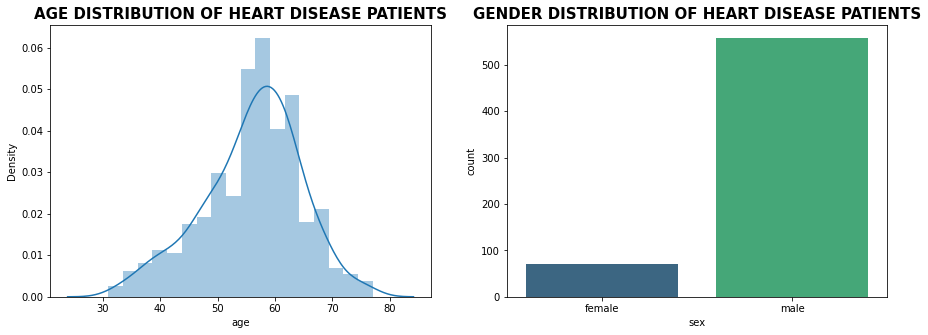

In [26]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

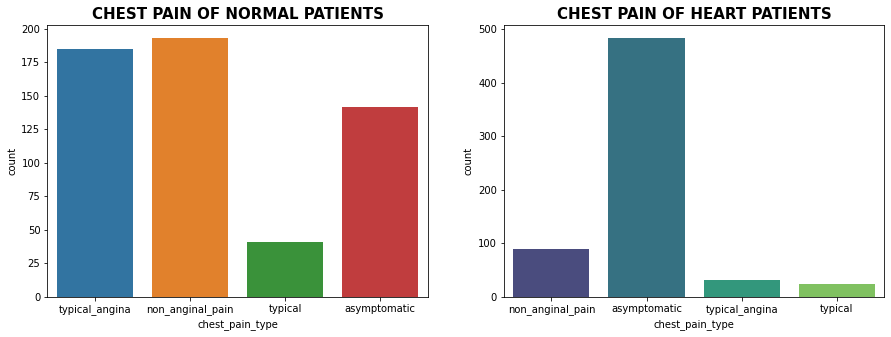

In [27]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [28]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
non_anginal_pain,34.400000,14.170000
typical,7.310000,3.980000
typical_angina,32.980000,4.940000


![](https://i.ibb.co/R3V4tWC/heart1.png) <br>
An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

### ST-Slope Distribution

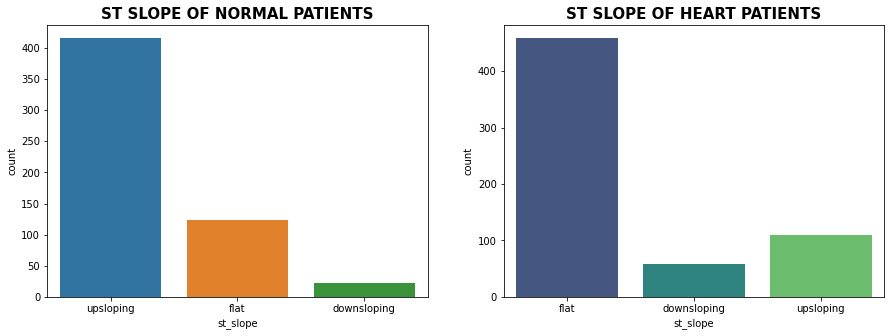

In [29]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()


In [30]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000



The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers. 

As we can see from above plot upsloping is positive sign as 74% of the normal patients have upslope where as 73.09% heart patients have flat sloping.

### Distribution of Numerical features

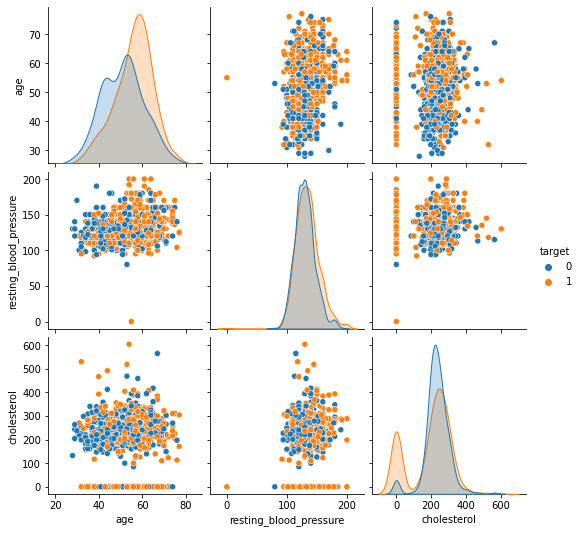

In [31]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

#### Distribution of Cholesterol vs Resting BP

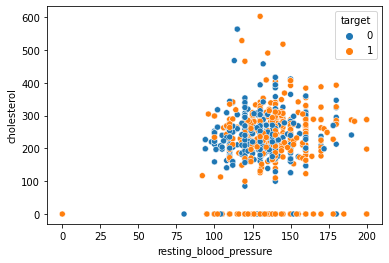

In [32]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

#### Distribution of Age vs Resting BP

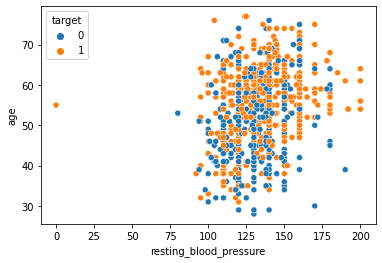

In [33]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

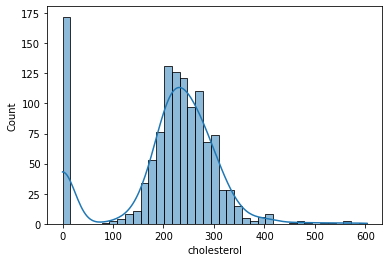

In [34]:
sns.histplot(data=dt, x="cholesterol", kde=True)

In [35]:
print(dt['cholesterol'].value_counts())

0      172
254     16
211     13
234     13
204     13
      ... 
385      1
466      1
129      1
338      1
131      1
Name: cholesterol, Length: 222, dtype: int64


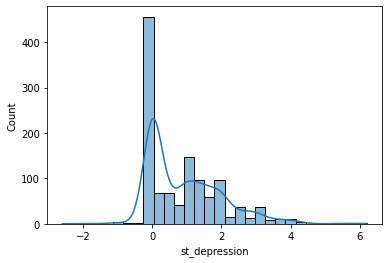

In [36]:
sns.histplot(data=dt, x="st_depression", kde=True)

In [37]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                    object
target                       int64
dtype: object

In [38]:
dt_numeric=dt.select_dtypes(include=['float64','int64'])
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,40,140,289,0,172,0,0.0,0
1,49,160,180,0,156,0,1.0,1
2,37,130,283,0,98,0,0.0,0
3,48,138,214,0,108,1,1.5,1
4,54,150,195,0,122,0,0.0,0


In [39]:
#melt data frame into long format
dt_numeric_melted = pd.melt(dt_numeric)

#view first 10 rows of melted data frame
dt_numeric_melted.head(10)

,variable,value
0,age,40.0
1,age,49.0
2,age,37.0
3,age,48.0
4,age,54.0
5,age,39.0
6,age,45.0
7,age,54.0
8,age,37.0
9,age,48.0


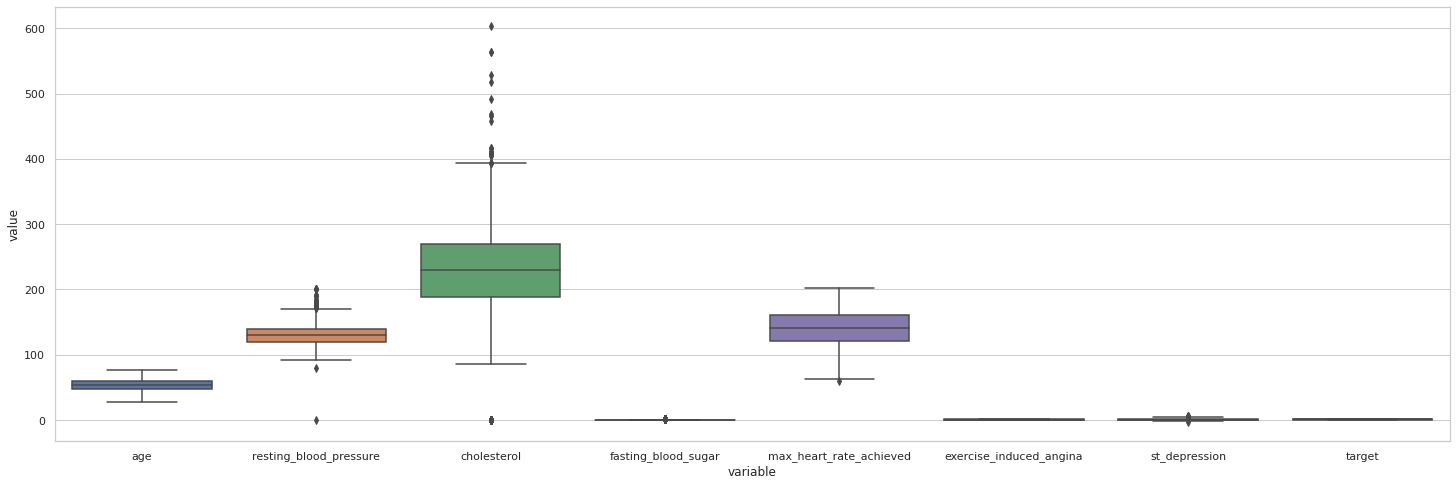

In [40]:
#create seaborn boxplots by group
plt.figure(figsize = (25,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='variable', y='value', data=dt_numeric_melted)

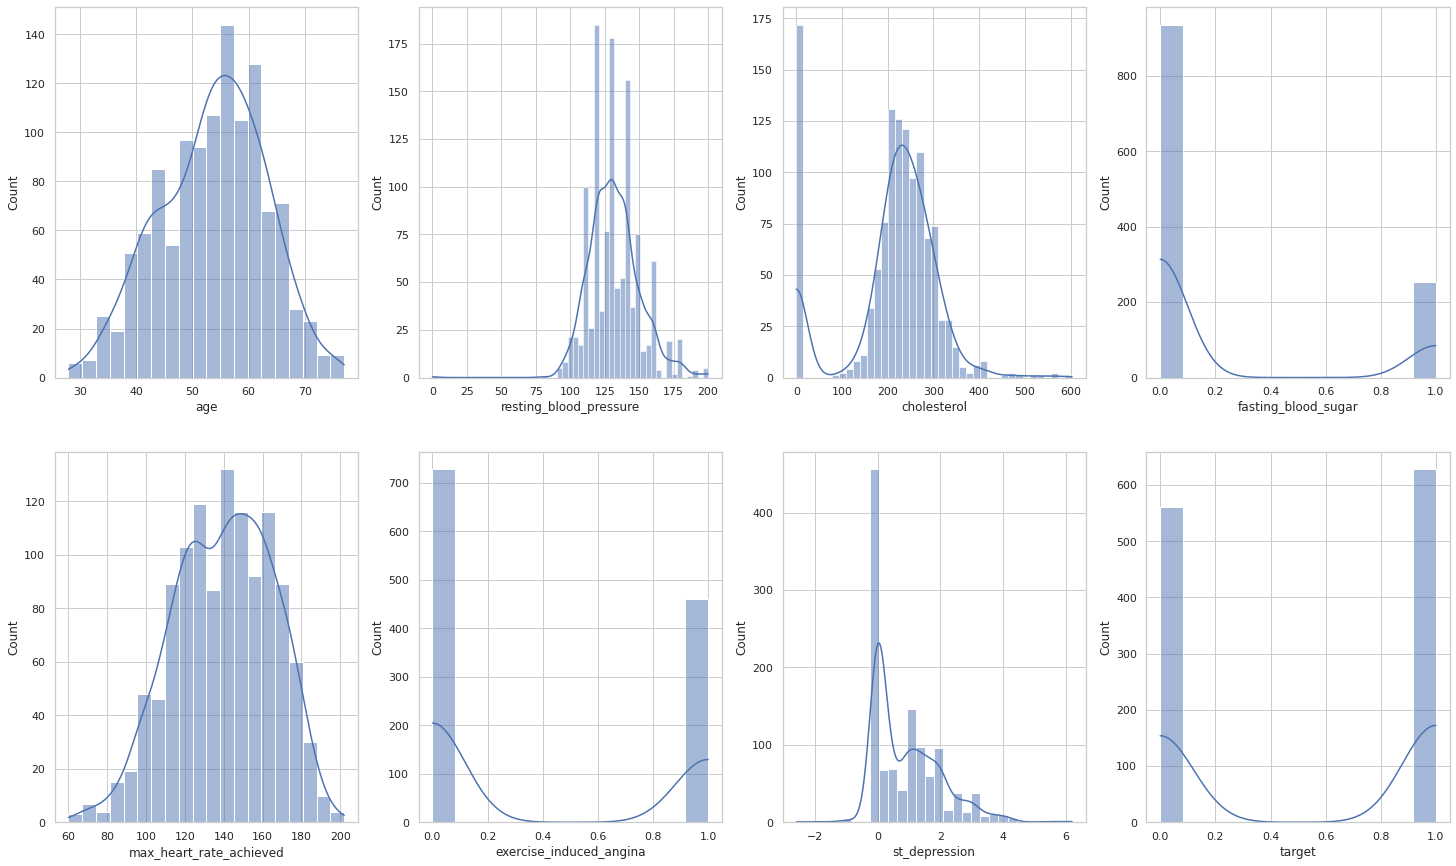

In [41]:
plt.figure(figsize=(25,15))
plt.subplot(2,4,1)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='age'])
sns.histplot(dt_numeric['age'], kde=True)

plt.subplot(2,4,2)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='resting_blood_pressure'])
sns.histplot(dt_numeric['resting_blood_pressure'], kde=True)

plt.subplot(2,4,3)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='cholesterol'])
sns.histplot(dt_numeric['cholesterol'], kde=True)

plt.subplot(2,4,4)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='fasting_blood_sugar'])
sns.histplot(dt_numeric['fasting_blood_sugar'], kde=True)

plt.subplot(2,4,5)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='max_heart_rate_achieved'])
sns.histplot(dt_numeric['max_heart_rate_achieved'], kde=True)

plt.subplot(2,4,6)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='exercise_induced_angina'])
sns.histplot(dt_numeric['exercise_induced_angina'], kde=True)

plt.subplot(2,4,7)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='st_depression'])
sns.histplot(dt_numeric['st_depression'], kde=True)
plt.subplot(2,4,8)
#sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='exercise_induced_angina'])
sns.histplot(dt_numeric['target'], kde=True)

plt.show()

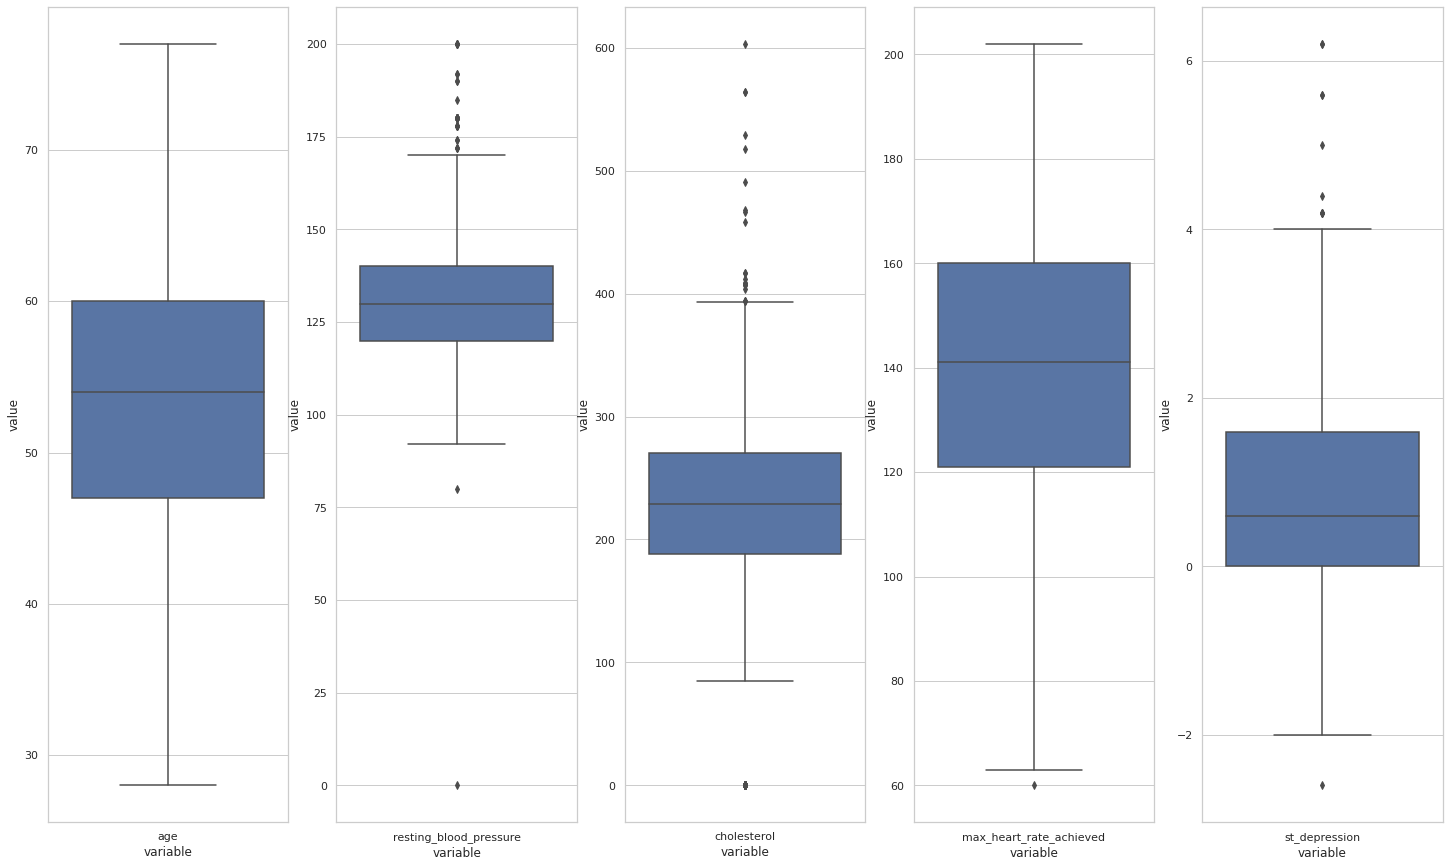

In [42]:
plt.figure(figsize=(25,15))
plt.subplot(1,5,1)
sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='age'])

plt.subplot(1,5,2)
sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='resting_blood_pressure'])

plt.subplot(1,5,3)
sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='cholesterol'])

plt.subplot(1,5,4)
sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='max_heart_rate_achieved'])

plt.subplot(1,5,5)
sns.boxplot(x='variable', y='value', data=dt_numeric_melted[dt_numeric_melted.variable=='st_depression'])

plt.show()

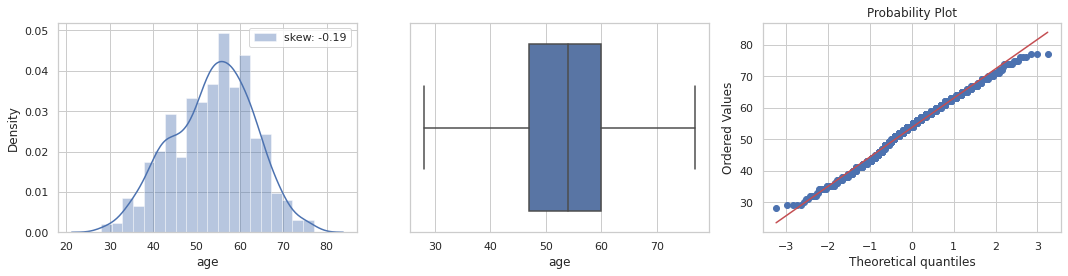

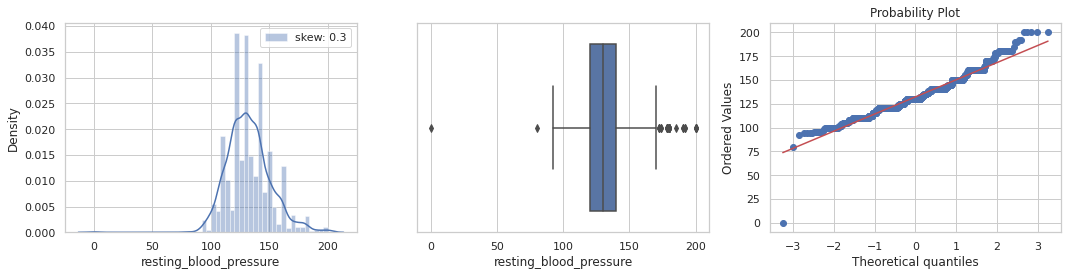

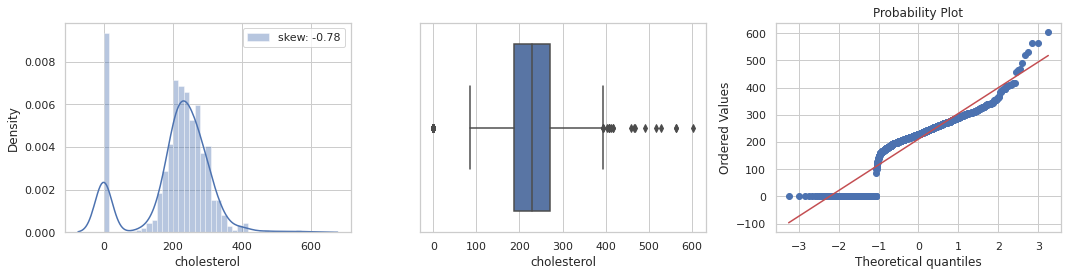

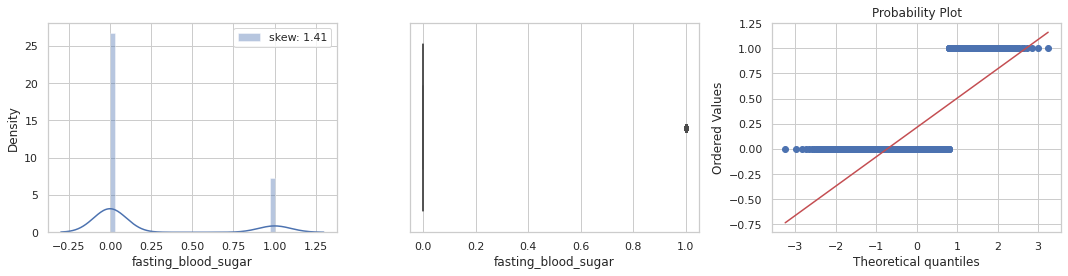

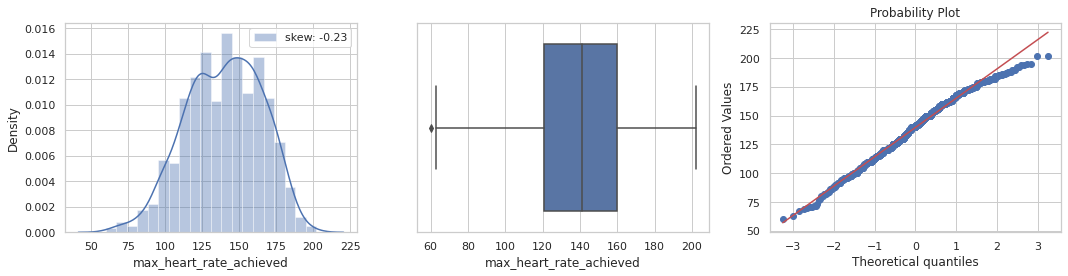

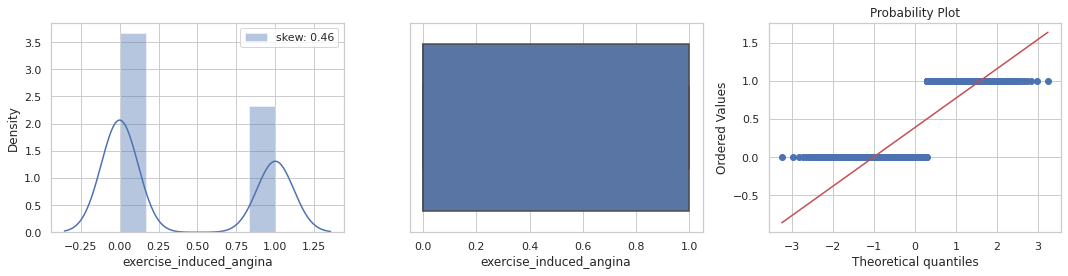

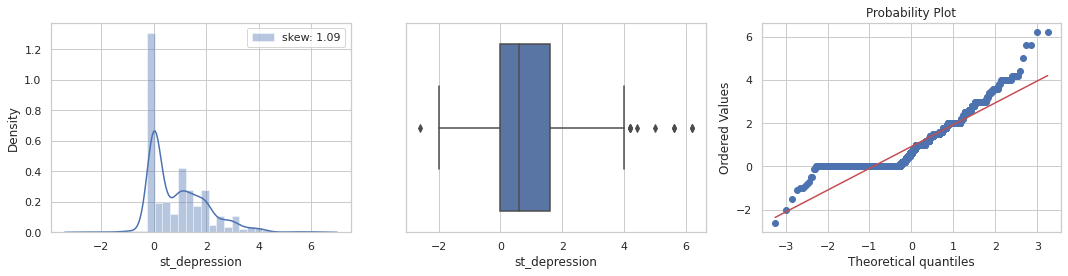

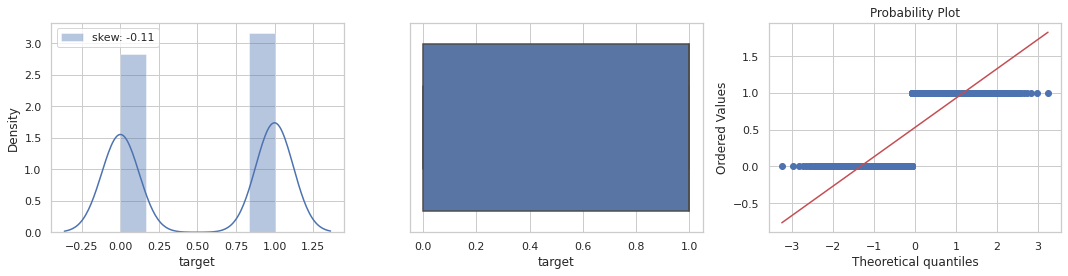

In [43]:
for col in list(dt_numeric):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(dt_numeric[col], label="skew: " + str(np.round(dt_numeric[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(dt_numeric[col])
    plt.subplot(133)
    stats.probplot(dt_numeric[col], plot=plt)
    plt.tight_layout()
    plt.show()

## 6. Outlier Detection & Removal <a id='data-out'></a>
### Detecting outlier using z-score
![](https://i.ibb.co/bgRRWrp/outlier.jpg)
![](https://i.ibb.co/jDHP7Sj/Z-score-formula.jpg)

In [44]:
def check_shape(dt):
  row = dt.shape[0]
  column = dt.shape[1]
  return print(f'There are {row} rows and {column} columns in the dataframe' )

In [45]:
check_shape(dt)

There are 1189 rows and 12 columns in the dataframe


In [46]:
check_shape(dt_numeric)

There are 1189 rows and 8 columns in the dataframe


In [47]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,40,140,289,0,172,0,0.0,0
1,49,160,180,0,156,0,1.0,1
2,37,130,283,0,98,0,0.0,0
3,48,138,214,0,108,1,1.5,1
4,54,150,195,0,122,0,0.0,0


### Z score capping

In [48]:
dt_numeric_zscore = dt_numeric.apply(stats.zscore)
dt_numeric_zscore.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,-1.466266,0.428136,0.775228,-0.519903,1.264301,-0.795765,-0.850408,-1.058031
1,-0.503599,1.517370,-0.299516,-0.519903,0.637259,-0.795765,0.070396,0.945152
2,-1.787155,-0.116481,0.716067,-0.519903,-1.635766,-0.795765,-0.850408,-1.058031
3,-0.610562,0.319212,0.035725,-0.519903,-1.243865,1.256653,0.530798,0.945152
4,0.031216,0.972753,-0.151616,-0.519903,-0.695204,-0.795765,-0.850408,-1.058031


In [49]:
def zscore_trim(df, cols, thr):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        s = df[col]
        
        indexes = s[(s>upper_bound) | (s<lower_bound)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
        
    return drop_outliers

In [50]:
list(dt_numeric_zscore)

['age',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'target']

### Identify outlier with thredhold 3

In [51]:
dropped = np.unique(zscore_trim(dt_numeric_zscore,list(dt_numeric_zscore), 3))
dropped

array([  30.,   76.,  109.,  149.,  167.,  242.,  325.,  366.,  371.,
        391.,  400.,  450.,  593.,  618.,  704.,  734.,  761.,  773.,
        793.,  852.,  978., 1010., 1013., 1039., 1070., 1075., 1078.,
       1172.])

In [52]:
outlier_dt=dt_numeric_zscore.loc[[  30.,   76.,  109.,  149.,  167.,  242.,  325.,  366.,  371.,
        391.,  400.,  450.,  593.,  618.,  704.,  734.,  761.,  773.,
        793.,  852.,  978., 1010., 1013., 1039., 1070., 1075., 1078.,
       1172.]]

In [53]:
for i in list(outlier_dt):
  outlier_num = (np.absolute(outlier_dt[i])>3).sum()
  print(f'Column {i} has {outlier_num} outlier')

Column age has 0 outlier
Column resting_blood_pressure has 10 outlier
Column cholesterol has 5 outlier
Column fasting_blood_sugar has 0 outlier
Column max_heart_rate_achieved has 2 outlier
Column exercise_induced_angina has 0 outlier
Column st_depression has 11 outlier
Column target has 0 outlier


### Remove outliers from dataset

In [54]:
dt_dropped=dt.copy()
check_shape(dt_dropped)

There are 1189 rows and 12 columns in the dataframe


In [55]:
dt_dropped.drop(labels=dropped, inplace=True)
check_shape(dt_dropped)

There are 1161 rows and 12 columns in the dataframe


In [56]:
check_shape(dt)

There are 1189 rows and 12 columns in the dataframe


In [57]:
dt_dropped.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1161.0,53.671835,9.391209,28.0,47.0,54.0,60.0,77.0
resting_blood_pressure,1161.0,131.663221,17.064718,80.0,120.0,130.0,140.0,185.0
cholesterol,1161.0,209.341085,98.673665,0.0,188.0,229.0,269.0,491.0
fasting_blood_sugar,1161.0,0.212748,0.409427,0.0,0.0,0.0,0.0,1.0
max_heart_rate_achieved,1161.0,139.917313,25.353774,67.0,121.0,141.0,160.0,202.0
exercise_induced_angina,1161.0,0.386736,0.487212,0.0,0.0,0.0,1.0,1.0
st_depression,1161.0,0.888630,1.012325,-2.0,0.0,0.6,1.5,4.0
target,1161.0,0.521102,0.499770,0.0,0.0,1.0,1.0,1.0


In [58]:
dt_dropped.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,typical_angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non_anginal_pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,typical_angina,130,283,0,st_t_wave_abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non_anginal_pain,150,195,0,normal,122,0,0.0,upsloping,0


### Encode categorical variables

In [59]:
dt = pd.get_dummies(dt_dropped, drop_first=True)
dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_non_anginal_pain,chest_pain_type_typical,chest_pain_type_typical_angina,rest_ecg_normal,rest_ecg_st_t_wave_abnormality,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,0,0,1,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,0,1,1,0,0,1,0,0,1


In [60]:
check_shape(dt)

There are 1161 rows and 16 columns in the dataframe


### Segregate dataset into feature i.e, X and target variables i.e y

In [61]:
X = dt.drop(['target'], axis = 1)
y = dt['target']

In [62]:
X.shape

(1161, 15)

In [63]:
y.shape

(1161,)

### Check Correlation


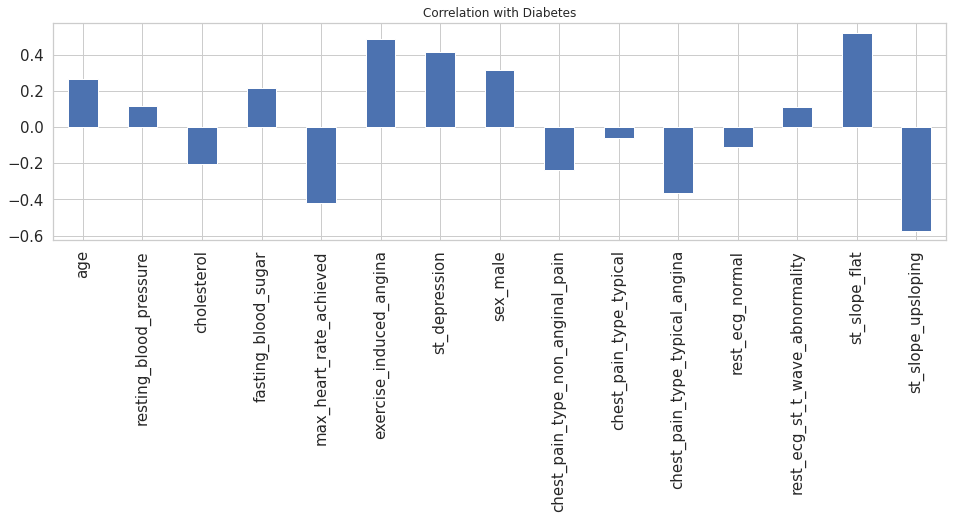

In [64]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

## 7. Train Test Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [66]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    484
0    444
Name: target, dtype: int64
Distribution of traget variable in test set
1    121
0    112
Name: target, dtype: int64


In [67]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(928, 15)
(928,)
------------Test Set------------------
(233, 15)
(233,)


In [68]:
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_non_anginal_pain,chest_pain_type_typical,chest_pain_type_typical_angina,rest_ecg_normal,rest_ecg_st_t_wave_abnormality,st_slope_flat,st_slope_upsloping
646,71,110,265,1,130,0,0.0,0,1,0,0,0,0,0,1
999,52,118,186,0,190,0,0.0,1,0,1,0,0,0,1,0
1163,66,146,278,0,152,0,0.0,0,1,0,0,0,0,1,0
578,67,146,369,0,110,1,1.9,1,0,0,0,1,0,1,0
554,74,145,216,1,116,1,1.8,1,0,1,0,1,0,1,0


### Feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_non_anginal_pain,chest_pain_type_typical,chest_pain_type_typical_angina,rest_ecg_normal,rest_ecg_st_t_wave_abnormality,st_slope_flat,st_slope_upsloping
646,0.877551,0.193548,0.566239,1,0.458647,0,0.333333,0,1,0,0,0,0,0,1
999,0.489796,0.279570,0.397436,0,0.909774,0,0.333333,1,0,1,0,0,0,1,0
1163,0.775510,0.580645,0.594017,0,0.624060,0,0.333333,0,1,0,0,0,0,1,0
578,0.795918,0.580645,0.788462,0,0.308271,1,0.650000,1,0,0,0,1,0,1,0
554,0.938776,0.569892,0.461538,1,0.353383,1,0.633333,1,0,1,0,1,0,1,0


In [70]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_non_anginal_pain,chest_pain_type_typical,chest_pain_type_typical_angina,rest_ecg_normal,rest_ecg_st_t_wave_abnormality,st_slope_flat,st_slope_upsloping
454,0.653061,0.301075,0.000000,0,0.481203,1,0.666667,1,0,0,0,1,0,0,1
152,0.244898,0.408602,0.587607,0,0.609023,0,0.333333,1,0,0,1,1,0,0,1
46,0.183673,0.301075,0.476496,0,0.744361,0,0.333333,1,0,0,0,1,0,0,1
471,0.510204,0.365591,0.000000,0,0.278195,0,0.333333,1,0,0,0,1,0,1,0
127,0.408163,0.172043,0.348291,0,0.796992,0,0.666667,0,0,0,0,1,0,0,1


## 8. Cross Validation
In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method

In [71]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LogisticRegression12'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LinearDiscriminantAnalysis'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNeighborsClassifier7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNeighborsClassifier5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNeighborsClassifier9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNeighborsClassifier11'  , KNeighborsClassifier(11)))
    basedModels.append(('DecisionTreeClassifier' , DecisionTreeClassifier()))
    basedModels.append(('GaussianNB'   , GaussianNB()))
    basedModels.append(('SVC_Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVC_RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AdaBoostClassifier'   , AdaBoostClassifier()))
    basedModels.append(('GradientBoostingClassifier'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RandomForestClassifier_Entropy100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RandomForestClassifier_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ExtraTreesClassifier100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ExtraTreesClassifier500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLPClassifier', MLPClassifier()))
    basedModels.append(('SGDClassifier1000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGBClassifier2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGBClassifier500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGBClassifier100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGBClassifier1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ExtraTreesClassifier1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [74]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [75]:
models = GetBasedModel()
models

[('LogisticRegression12', LogisticRegression()),
 ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
 ('KNeighborsClassifier7', KNeighborsClassifier(n_neighbors=7)),
 ('KNeighborsClassifier5', KNeighborsClassifier()),
 ('KNeighborsClassifier9', KNeighborsClassifier(n_neighbors=9)),
 ('KNeighborsClassifier11', KNeighborsClassifier(n_neighbors=11)),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('GaussianNB', GaussianNB()),
 ('SVC_Linear', SVC(gamma='auto', kernel='linear', probability=True)),
 ('SVC_RBF', SVC(gamma='auto', probability=True)),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier',
  GradientBoostingClassifier(max_features='sqrt')),
 ('RandomForestClassifier_Entropy100',
  RandomForestClassifier(criterion='entropy')),
 ('RandomForestClassifier_Gini100', RandomForestClassifier()),
 ('ExtraTreesClassifier100', ExtraTreesClassifier()),
 ('ExtraTreesClassifier500', ExtraTreesClassifier(n_estimators=500)),
 ('MLPClassifier', MLPClas

In [76]:
names,results = BasedLine2(X_train, y_train,models)

LogisticRegression12: 0.850187 (0.049795)
LinearDiscriminantAnalysis: 0.853436 (0.044442)
KNeighborsClassifier7: 0.846914 (0.043866)
KNeighborsClassifier5: 0.851251 (0.030615)
KNeighborsClassifier9: 0.844811 (0.052060)
KNeighborsClassifier11: 0.844811 (0.038097)
DecisionTreeClassifier: 0.862108 (0.045041)
GaussianNB: 0.848001 (0.050105)
SVC_Linear: 0.849100 (0.048983)
SVC_RBF: 0.857714 (0.052635)
AdaBoostClassifier: 0.851239 (0.048960)
GradientBoostingClassifier: 0.882504 (0.041317)
RandomForestClassifier_Entropy100: 0.914867 (0.032195)
RandomForestClassifier_Gini100: 0.920266 (0.033830)
ExtraTreesClassifier100: 0.909467 (0.038372)
ExtraTreesClassifier500: 0.915930 (0.037674)
MLPClassifier: 0.868478 (0.043864)
SGDClassifier1000: 0.832971 (0.035837)
XGBClassifier2000: 0.911641 (0.032727)
XGBClassifier500: 0.920278 (0.030163)
XGBClassifier100: 0.886816 (0.037999)
XGBClassifier1000: 0.915965 (0.034352)
ExtraTreesClassifier1000: 0.912705 (0.037856)


From the above results, it is clear that the **XGBClassifier500** model outperformed others by attaining accuracy of **92.027%**.

## 9. Model building
Next, we will train all the machine learning models that were cross-validated in the prior step and evaluate their performance on test data.

In [77]:
#LogisticRegression12
LogisticRegression12 = LogisticRegression(penalty='l2')
LogisticRegression12.fit(X_train, y_train)
y_pred_LogisticRegression12 = LogisticRegression12.predict(X_test)

#LinearDiscriminantAnalysis
LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis.fit(X_train, y_train)
y_pred_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis.predict(X_test)

#KNeighborsClassifier5
KNeighborsClassifier5 = KNeighborsClassifier(5)
KNeighborsClassifier5.fit(X_train, y_train)
y_pred_KNeighborsClassifier5 = KNeighborsClassifier5.predict(X_test)

#KNeighborsClassifier7
KNeighborsClassifier7 = KNeighborsClassifier(7)
KNeighborsClassifier7.fit(X_train, y_train)
y_pred_KNeighborsClassifier7 = KNeighborsClassifier7.predict(X_test)

#KNeighborsClassifier9
KNeighborsClassifier9 = KNeighborsClassifier(9)
KNeighborsClassifier9.fit(X_train, y_train)
y_pred_KNeighborsClassifier9 = KNeighborsClassifier9.predict(X_test)

#KNeighborsClassifier11
KNeighborsClassifier11 = KNeighborsClassifier(11)
KNeighborsClassifier11.fit(X_train, y_train)
y_pred_KNeighborsClassifier11 = KNeighborsClassifier11.predict(X_test)

#DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)

#DecisionTreeClassifier
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)
y_pred_GaussianNB = GaussianNB.predict(X_test)

#SVM_Linear
SVC_Linear = SVC(kernel='linear',gamma='auto',probability=True)
SVC_Linear.fit(X_train, y_train)
y_pred_SVC_Linear = SVC_Linear.predict(X_test)

#SVC_RBF
SVC_RBF = SVC(kernel='rbf',gamma='auto',probability=True)
SVC_RBF.fit(X_train, y_train)
y_pred_SVC_RBF = SVC_RBF.predict(X_test)

#AdaBoostClassifier
AdaBoostClassifier = AdaBoostClassifier()
AdaBoostClassifier.fit(X_train, y_train)
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)

#GradientBoostingClassifier
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
GradientBoostingClassifier.fit(X_train, y_train)
y_pred_GradientBoostingClassifier = GradientBoostingClassifier.predict(X_test)

#RandomForestClassifier_Entropy100
RandomForestClassifier_Entropy100 = RandomForestClassifier(criterion='entropy',n_estimators=100)
RandomForestClassifier_Entropy100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Entropy100 = RandomForestClassifier_Entropy100.predict(X_test)

#RandomForestClassifier_Gini100
RandomForestClassifier_Gini100 = RandomForestClassifier(criterion='gini',n_estimators=100)
RandomForestClassifier_Gini100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Gini100 = RandomForestClassifier_Gini100.predict(X_test)

#ExtraTreesClassifier100
ExtraTreesClassifier100 = ExtraTreesClassifier(n_estimators= 100)
ExtraTreesClassifier100.fit(X_train, y_train)
y_pred_ExtraTreesClassifier100 = ExtraTreesClassifier100.predict(X_test)

#ExtraTreesClassifier500
ExtraTreesClassifier500 = ExtraTreesClassifier(n_estimators= 500)
ExtraTreesClassifier500.fit(X_train, y_train)
y_pred_ExtraTreesClassifier500 = ExtraTreesClassifier500.predict(X_test)

#MLPClassifier
MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_train, y_train)
y_pred_MLPClassifier = MLPClassifier.predict(X_test)

#SGDClassifier1000
SGDClassifier1000 = SGDClassifier(max_iter=1000, tol=1e-4)
SGDClassifier1000.fit(X_train, y_train)
y_pred_SGDClassifier1000 = SGDClassifier1000.predict(X_test)

#XGBClassifier2000
XGBClassifier2000 = xgb.XGBClassifier(n_estimators= 2000)
XGBClassifier2000.fit(X_train, y_train)
y_pred_XGBClassifier2000 = XGBClassifier2000.predict(X_test)

#XGBClassifier500
XGBClassifier500 = xgb.XGBClassifier(n_estimators= 500)
XGBClassifier500.fit(X_train, y_train)
y_pred_XGBClassifier500 = XGBClassifier500.predict(X_test)

#XGBClassifier100
XGBClassifier100 = xgb.XGBClassifier(n_estimators= 100)
XGBClassifier100.fit(X_train, y_train)
y_pred_XGBClassifier100 = XGBClassifier100.predict(X_test)

#XGBClassifier1000
XGBClassifier1000 = xgb.XGBClassifier(n_estimators= 1000)
XGBClassifier1000.fit(X_train, y_train)
y_pred_XGBClassifier1000 = XGBClassifier1000.predict(X_test)

#ExtraTreesClassifier1000
ExtraTreesClassifier1000 = ExtraTreesClassifier(n_estimators= 1000)
ExtraTreesClassifier1000.fit(X_train, y_train)
y_pred_ExtraTreesClassifier1000 = ExtraTreesClassifier1000.predict(X_test)


## 10. Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,LogisticRegression12,0.815451,0.804688,0.85124,0.776786,0.827309,0.814013,6.374195,0.630637


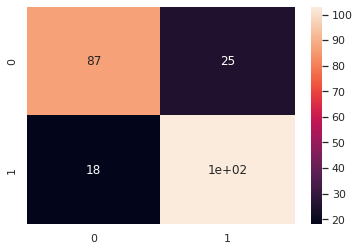

In [78]:
CM=confusion_matrix(y_test,y_pred_LogisticRegression12)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_LogisticRegression12)
acc= accuracy_score(y_test, y_pred_LogisticRegression12)
roc=roc_auc_score(y_test, y_pred_LogisticRegression12)
prec = precision_score(y_test, y_pred_LogisticRegression12)
rec = recall_score(y_test, y_pred_LogisticRegression12)
f1 = f1_score(y_test, y_pred_LogisticRegression12)

mathew = matthews_corrcoef(y_test, y_pred_LogisticRegression12)
model_results =pd.DataFrame([['LogisticRegression12',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [79]:
data = {        'LinearDiscriminantAnalysis': y_pred_LinearDiscriminantAnalysis, 
                'KNeighborsClassifier5': y_pred_KNeighborsClassifier5, 
                'KNeighborsClassifier7': y_pred_KNeighborsClassifier7,
                'KNeighborsClassifier9': y_pred_KNeighborsClassifier9, 
                'KNeighborsClassifier11': y_pred_KNeighborsClassifier11, 
                'DecisionTreeClassifier': y_pred_DecisionTreeClassifier,
                'GaussianNB': y_pred_GaussianNB, 
                'SVC_Linear': y_pred_SVC_Linear, 
                'SVC_RBF': y_pred_SVC_RBF,
                'AdaBoostClassifier': y_pred_AdaBoostClassifier,
                'GradientBoostingClassifier': y_pred_GradientBoostingClassifier,
                'RandomForestClassifier_Entropy100': y_pred_RandomForestClassifier_Entropy100,
                'RandomForestClassifier_Gini100': y_pred_RandomForestClassifier_Gini100,
                'ExtraTreesClassifier100': y_pred_ExtraTreesClassifier100,
                'ExtraTreesClassifier500': y_pred_ExtraTreesClassifier500,
                'MLPClassifier': y_pred_MLPClassifier,
                'SGDClassifier1000': y_pred_SGDClassifier1000,
                'XGBClassifier2000': y_pred_XGBClassifier2000,
                'XGBClassifier500': y_pred_XGBClassifier500,
                'XGBClassifier100': y_pred_XGBClassifier100,
                'XGBClassifier1000': y_pred_XGBClassifier1000,
                'ExtraTreesClassifier1000': y_pred_ExtraTreesClassifier1000
        }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,LogisticRegression12,0.815451,0.804688,0.851240,0.776786,0.827309,0.814013,6.374195,0.630637
1,LinearDiscriminantAnalysis,0.815451,0.809524,0.842975,0.785714,0.825911,0.814345,6.374191,0.630319
2,KNeighborsClassifier5,0.824034,0.822581,0.842975,0.803571,0.832653,0.823273,6.077714,0.647407
3,KNeighborsClassifier7,0.811159,0.808000,0.834711,0.785714,0.821138,0.810213,6.522426,0.621619
4,KNeighborsClassifier9,0.828326,0.813953,0.867769,0.785714,0.840000,0.826741,5.929486,0.656787
5,KNeighborsClassifier11,0.811159,0.793893,0.859504,0.758929,0.825397,0.809216,6.522437,0.622814
6,DecisionTreeClassifier,0.866953,0.846154,0.909091,0.821429,0.876494,0.865260,4.595356,0.734925
7,GaussianNB,0.811159,0.798450,0.851240,0.767857,0.824000,0.809548,6.522433,0.622227
8,SVC_Linear,0.819742,0.811024,0.851240,0.785714,0.830645,0.818477,6.225956,0.639080
9,SVC_RBF,0.828326,0.818898,0.859504,0.794643,0.838710,0.827073,5.929483,0.656330


In [80]:
model_results_sorted = model_results.sort_values(by=['ROC'],ascending=False)
model_results_sorted

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
15,ExtraTreesClassifier500,0.931330,0.906977,0.966942,0.892857,0.936000,0.929900,2.371803,0.864146
14,ExtraTreesClassifier100,0.927039,0.900000,0.966942,0.883929,0.932271,0.925435,2.520041,0.856002
18,XGBClassifier2000,0.922747,0.905512,0.950413,0.892857,0.927419,0.921635,2.668273,0.846085
22,ExtraTreesClassifier1000,0.922747,0.893130,0.966942,0.875000,0.928571,0.920971,2.668280,0.847907
21,XGBClassifier1000,0.918455,0.898438,0.950413,0.883929,0.923695,0.917171,2.816511,0.837811
12,RandomForestClassifier_Entropy100,0.918455,0.880597,0.975207,0.857143,0.925490,0.916175,2.816522,0.841274
13,RandomForestClassifier_Gini100,0.918455,0.880597,0.975207,0.857143,0.925490,0.916175,2.816522,0.841274
19,XGBClassifier500,0.914163,0.897638,0.942149,0.883929,0.919355,0.913039,2.964746,0.828834
20,XGBClassifier100,0.871245,0.876033,0.876033,0.866071,0.876033,0.871052,4.447104,0.742104
6,DecisionTreeClassifier,0.866953,0.846154,0.909091,0.821429,0.876494,0.865260,4.595356,0.734925


### Findings
As we can see from above results, ExtraTreesClassifier100	 is best performer

### ROC AUC Curve


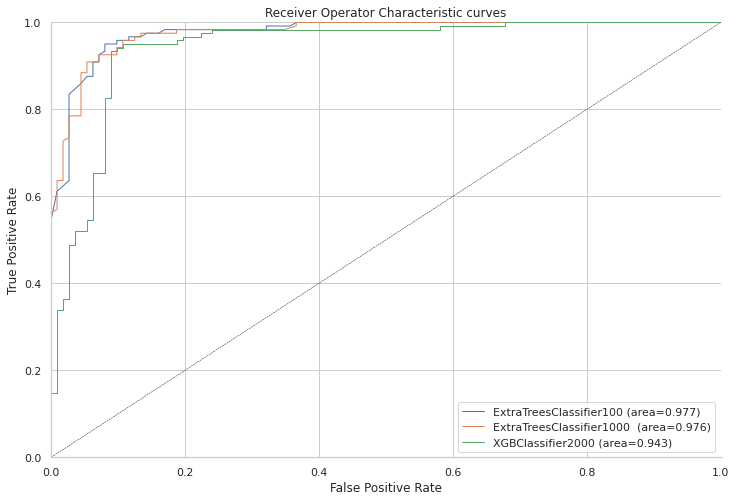

In [81]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,ExtraTreesClassifier100.predict_proba(X_test),label='ExtraTreesClassifier100',l='-')
roc_auc_plot(y_test,ExtraTreesClassifier1000.predict_proba(X_test),label='ExtraTreesClassifier1000 ',l='-')
roc_auc_plot(y_test,XGBClassifier2000.predict_proba(X_test),label='XGBClassifier2000',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

### Precision Recall curve


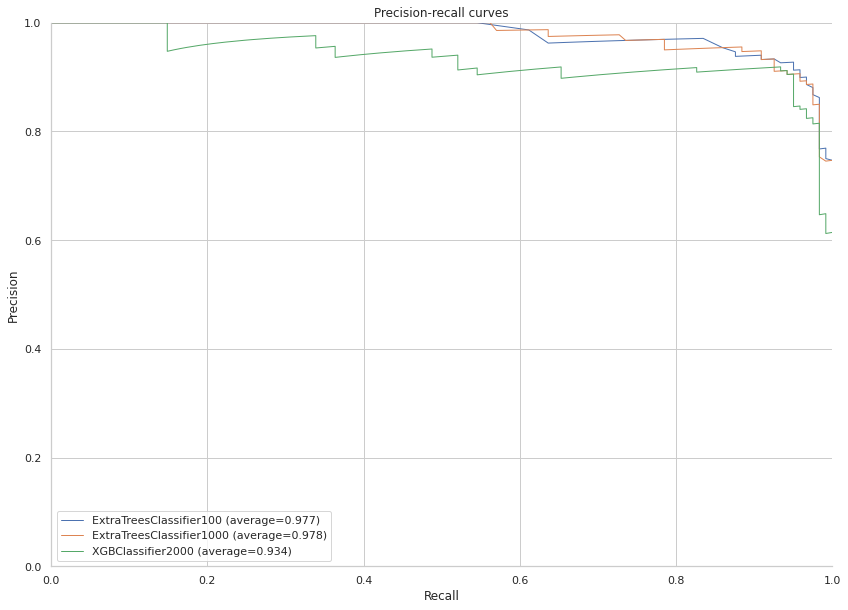

In [82]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,ExtraTreesClassifier100.predict_proba(X_test),label='ExtraTreesClassifier100',l='-')
precision_recall_plot(y_test,ExtraTreesClassifier1000.predict_proba(X_test),label='ExtraTreesClassifier1000',l='-')
precision_recall_plot(y_test,XGBClassifier2000.predict_proba(X_test),label='XGBClassifier2000',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

### Feature Importance 

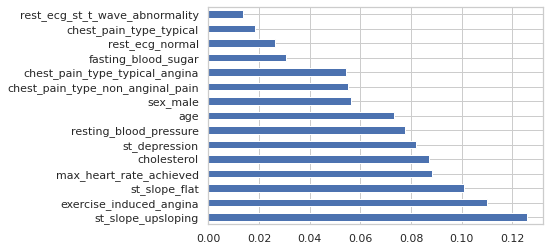

In [83]:
feat_importances = pd.Series(ExtraTreesClassifier100.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Exported Model

In [84]:
for column in X_test.columns:
  print(column)

age
resting_blood_pressure
cholesterol
fasting_blood_sugar
max_heart_rate_achieved
exercise_induced_angina
st_depression
sex_male
chest_pain_type_non_anginal_pain
chest_pain_type_typical
chest_pain_type_typical_angina
rest_ecg_normal
rest_ecg_st_t_wave_abnormality
st_slope_flat
st_slope_upsloping


In [85]:
import pickle

In [86]:
#pickle.dump(ExtraTreesClassifier100, open('/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/ExtraTreesClassifier100_acc093.sav','wb'))

In [87]:
#loading the saved model 
loaded_model=pickle.load(open('/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/ExtraTreesClassifier100_acc093.sav','rb'))

In [88]:
####DEFAULT VARIABLES
fasting_blood_sugar = 0
exercise_induced_angina = 0
sex_male = 1
chest_pain_type_non_anginal_pain = 1
chest_pain_type_typical = 0
chest_pain_type_typical_angina = 0
rest_ecg_normal = 1
rest_ecg_st_t_wave_abnormality = 0
st_slope_flat = 0
st_slope_upsloping = 1
###**********INPUT VARIABLES*******************

age = 40
sex = 'Male'
chest_pain_type = 'Typical'
resting_blood_pressure = 140
cholesterol = 289
fasting_blood_sugar = 'No'
rest_ecg = 'Normal'
max_heart_rate_achieved = 172
exercise_induced_angina = 'No'
st_depression = 0
st_slope='Upsloping'

###############################################
#SEX:        Male=1, Female =0
if sex == 'male':
  sex_male = 1
else:
  sex_male = 0

#################################################
# CHEST PAIN TYPE
#1: typical
#2: typical angina
#3: non-anginal pain
#4: asymptomatic
if chest_pain_type == 'Typical':
  chest_pain_type_non_anginal_pain = 0
  chest_pain_type_typical = 1
  chest_pain_type_typical_angina = 0
elif chest_pain_type == 'Typical angina':
  chest_pain_type_non_anginal_pain = 0
  chest_pain_type_typical = 0
  chest_pain_type_typical_angina = 1
elif chest_pain_type == 'Non-anginal pain':
  chest_pain_type_non_anginal_pain = 1
  chest_pain_type_typical = 0
  chest_pain_type_typical_angina = 0  
else:
  chest_pain_type_non_anginal_pain = 0
  chest_pain_type_typical = 0
  chest_pain_type_typical_angina = 0 

########################################################
#FASTING BLOOD SUGAR
#1: Yes
#0: No
if fasting_blood_sugar == 'Yes':
  fasting_blood_sugar = 1
else:
  fasting_blood_sugar = 0
  
#######################################################

#REST ECG
if rest_ecg == 'Normal':
  rest_ecg_normal = 1
  rest_ecg_st_t_wave_abnormality = 0
elif rest_ecg == 'Abnormality in ST-T wave':
  rest_ecg_normal = 0
  rest_ecg_st_t_wave_abnormality = 1
elif rest_ecg == 'Left ventricular hypertrophy (Nominal)':
  rest_ecg_normal = 0
  rest_ecg_st_t_wave_abnormality = 0 

##################################################

#EXERCISE INDUCE ANGINA
#1: Yes
#0: No
if exercise_induced_angina == 'Yes':
  exercise_induced_angina = 1
else:
  exercise_induced_angina = 0

####################################################

#ST SLOPE
if st_slope == 'Flat':
  st_slope_flat = 1
  st_slope_upsloping = 0
elif st_slope == 'Upsloping':
  st_slope_flat = 0
  st_slope_upsloping = 1 
else:
  st_slope_flat = 0
  st_slope_upsloping = 0 

In [89]:
input_data = (age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,
sex_male,chest_pain_type_non_anginal_pain,chest_pain_type_typical,chest_pain_type_typical_angina,rest_ecg_normal,rest_ecg_st_t_wave_abnormality,st_slope_flat,st_slope_upsloping)

In [90]:
print(input_data)

(40, 140, 289, 0, 172, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1)


In [91]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('No Heart Disease')
else:
  print('Heart Disease')

[0]
No Heart Disease


## 11. Feature Selection
Feature selection (FS) is the method for filtering out irrelevant or redundant features from the dataset, which helps the machine learning model in reducing training time, building simple models, and interpreting features.



####Pearson correlation FS method

In [92]:
num_feats=15

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

15 selected features


### Chi-square

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

15 selected features


###  Recursive Feature elimination

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


### Embedded Logistic Regression

In [95]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


### Embedded Random forest

In [96]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


### Embedded Light gbm

In [97]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

7 selected features


### Identify important features

In [98]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,st_slope_flat,True,True,True,True,True,True,6
2,st_depression,True,True,True,True,True,True,6
3,cholesterol,True,True,True,True,True,True,6
4,resting_blood_pressure,True,True,True,False,True,True,5
5,max_heart_rate_achieved,True,True,True,False,True,True,5
6,exercise_induced_angina,True,True,True,False,True,True,5
7,age,True,True,True,False,True,True,5
8,st_slope_upsloping,True,True,True,False,True,False,4
9,sex_male,True,True,True,True,False,False,4
10,chest_pain_type_typical_angina,True,True,True,True,False,False,4


In [99]:
list(dt)

['age',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'target',
 'sex_male',
 'chest_pain_type_non_anginal_pain',
 'chest_pain_type_typical',
 'chest_pain_type_typical_angina',
 'rest_ecg_normal',
 'rest_ecg_st_t_wave_abnormality',
 'st_slope_flat',
 'st_slope_upsloping']

In [101]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','fasting_blood_sugar','rest_ecg_normal','rest_ecg_st_t_wave_abnormality','chest_pain_type_non_anginal_pain','chest_pain_type_typical','chest_pain_type_typical_angina'],axis=1)
y = dt['target']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [103]:
X_train.head(3)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,st_slope_flat,st_slope_upsloping
646,71,110,265,130,0,0.0,0,0,1
999,52,118,186,190,0,0.0,1,1,0
1163,66,146,278,152,0,0.0,0,1,0


In [104]:
y_train.head(3)

646     0
999     0
1163    0
Name: target, dtype: int64

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,st_slope_flat,st_slope_upsloping
646,0.877551,0.193548,0.566239,0.458647,0,0.333333,0,0,1
999,0.489796,0.279570,0.397436,0.909774,0,0.333333,1,1,0
1163,0.775510,0.580645,0.594017,0.624060,0,0.333333,0,1,0
578,0.795918,0.580645,0.788462,0.308271,1,0.650000,1,1,0
554,0.938776,0.569892,0.461538,0.353383,1,0.633333,1,1,0


In [107]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,st_slope_flat,st_slope_upsloping
454,0.653061,0.301075,0.000000,0.481203,1,0.666667,1,0,1
152,0.244898,0.408602,0.587607,0.609023,0,0.333333,1,0,1
46,0.183673,0.301075,0.476496,0.744361,0,0.333333,1,0,1
471,0.510204,0.365591,0.000000,0.278195,0,0.333333,1,1,0
127,0.408163,0.172043,0.348291,0.796992,0,0.666667,0,0,1


### Model Buidling after feature selections

In [113]:
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LogisticRegression12: 0.836197 (0.050470)
LinearDiscriminantAnalysis: 0.839434 (0.045765)
KNeighborsClassifier7: 0.829710 (0.032635)
KNeighborsClassifier5: 0.829722 (0.034253)
KNeighborsClassifier9: 0.826508 (0.037627)
KNeighborsClassifier11: 0.836185 (0.038135)
DecisionTreeClassifier: 0.846996 (0.027095)
GaussianNB: 0.843712 (0.046091)
SVC_Linear: 0.832971 (0.044645)
SVC_RBF: 0.826508 (0.042336)
AdaBoostClassifier: 0.843700 (0.060171)
GradientBoostingClassifier: 0.877092 (0.046013)
RandomForestClassifier_Entropy100: 0.905189 (0.034347)
RandomForestClassifier_Gini100: 0.906265 (0.034771)
ExtraTreesClassifier100: 0.893338 (0.029888)
ExtraTreesClassifier500: 0.894413 (0.030791)
MLPClassifier: 0.842637 (0.043677)
SGDClassifier1000: 0.786594 (0.071697)
XGBClassifier2000: 0.885799 (0.027728)
XGBClassifier500: 0.881475 (0.035448)
XGBClassifier100: 0.864201 (0.050756)
XGBClassifier1000: 0.884724 (0.029674)
ExtraTreesClassifier1000: 0.899813 (0.033030)


In [114]:
#LogisticRegression12
LogisticRegression12 = LogisticRegression(penalty='l2')
LogisticRegression12.fit(X_train, y_train)
y_pred_LogisticRegression12 = LogisticRegression12.predict(X_test)

#LinearDiscriminantAnalysis
LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis.fit(X_train, y_train)
y_pred_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis.predict(X_test)

#KNeighborsClassifier5
KNeighborsClassifier5 = KNeighborsClassifier(5)
KNeighborsClassifier5.fit(X_train, y_train)
y_pred_KNeighborsClassifier5 = KNeighborsClassifier5.predict(X_test)

#KNeighborsClassifier7
KNeighborsClassifier7 = KNeighborsClassifier(7)
KNeighborsClassifier7.fit(X_train, y_train)
y_pred_KNeighborsClassifier7 = KNeighborsClassifier7.predict(X_test)

#KNeighborsClassifier9
KNeighborsClassifier9 = KNeighborsClassifier(9)
KNeighborsClassifier9.fit(X_train, y_train)
y_pred_KNeighborsClassifier9 = KNeighborsClassifier9.predict(X_test)

#KNeighborsClassifier11
KNeighborsClassifier11 = KNeighborsClassifier(11)
KNeighborsClassifier11.fit(X_train, y_train)
y_pred_KNeighborsClassifier11 = KNeighborsClassifier11.predict(X_test)

#DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)

#DecisionTreeClassifier
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)
y_pred_GaussianNB = GaussianNB.predict(X_test)

#SVM_Linear
SVC_Linear = SVC(kernel='linear',gamma='auto',probability=True)
SVC_Linear.fit(X_train, y_train)
y_pred_SVC_Linear = SVC_Linear.predict(X_test)

#SVC_RBF
SVC_RBF = SVC(kernel='rbf',gamma='auto',probability=True)
SVC_RBF.fit(X_train, y_train)
y_pred_SVC_RBF = SVC_RBF.predict(X_test)

#AdaBoostClassifier
AdaBoostClassifier = AdaBoostClassifier()
AdaBoostClassifier.fit(X_train, y_train)
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)

#GradientBoostingClassifier
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
GradientBoostingClassifier.fit(X_train, y_train)
y_pred_GradientBoostingClassifier = GradientBoostingClassifier.predict(X_test)

#RandomForestClassifier_Entropy100
RandomForestClassifier_Entropy100 = RandomForestClassifier(criterion='entropy',n_estimators=100)
RandomForestClassifier_Entropy100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Entropy100 = RandomForestClassifier_Entropy100.predict(X_test)

#RandomForestClassifier_Gini100
RandomForestClassifier_Gini100 = RandomForestClassifier(criterion='gini',n_estimators=100)
RandomForestClassifier_Gini100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Gini100 = RandomForestClassifier_Gini100.predict(X_test)

#ExtraTreesClassifier100
ExtraTreesClassifier100 = ExtraTreesClassifier(n_estimators= 100)
ExtraTreesClassifier100.fit(X_train, y_train)
y_pred_ExtraTreesClassifier100 = ExtraTreesClassifier100.predict(X_test)

#ExtraTreesClassifier500
ExtraTreesClassifier500 = ExtraTreesClassifier(n_estimators= 500)
ExtraTreesClassifier500.fit(X_train, y_train)
y_pred_ExtraTreesClassifier500 = ExtraTreesClassifier500.predict(X_test)

#MLPClassifier
MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_train, y_train)
y_pred_MLPClassifier = MLPClassifier.predict(X_test)

#SGDClassifier1000
SGDClassifier1000 = SGDClassifier(max_iter=1000, tol=1e-4)
SGDClassifier1000.fit(X_train, y_train)
y_pred_SGDClassifier1000 = SGDClassifier1000.predict(X_test)

#XGBClassifier2000
XGBClassifier2000 = xgb.XGBClassifier(n_estimators= 2000)
XGBClassifier2000.fit(X_train, y_train)
y_pred_XGBClassifier2000 = XGBClassifier2000.predict(X_test)

#XGBClassifier500
XGBClassifier500 = xgb.XGBClassifier(n_estimators= 500)
XGBClassifier500.fit(X_train, y_train)
y_pred_XGBClassifier500 = XGBClassifier500.predict(X_test)

#XGBClassifier100
XGBClassifier100 = xgb.XGBClassifier(n_estimators= 100)
XGBClassifier100.fit(X_train, y_train)
y_pred_XGBClassifier100 = XGBClassifier100.predict(X_test)

#XGBClassifier1000
XGBClassifier1000 = xgb.XGBClassifier(n_estimators= 1000)
XGBClassifier1000.fit(X_train, y_train)
y_pred_XGBClassifier1000 = XGBClassifier1000.predict(X_test)

#ExtraTreesClassifier1000
ExtraTreesClassifier1000 = ExtraTreesClassifier(n_estimators= 1000)
ExtraTreesClassifier1000.fit(X_train, y_train)
y_pred_ExtraTreesClassifier1000 = ExtraTreesClassifier1000.predict(X_test)


### Model evaluatation after feature selection

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,LogisticRegression12,0.849785,0.84127,0.876033,0.821429,0.8583,0.848731,5.188297,0.69927


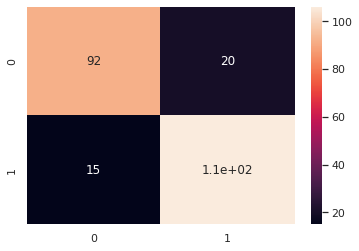

In [115]:
CM=confusion_matrix(y_test,y_pred_LogisticRegression12)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_LogisticRegression12)
acc= accuracy_score(y_test, y_pred_LogisticRegression12)
roc=roc_auc_score(y_test, y_pred_LogisticRegression12)
prec = precision_score(y_test, y_pred_LogisticRegression12)
rec = recall_score(y_test, y_pred_LogisticRegression12)
f1 = f1_score(y_test, y_pred_LogisticRegression12)

mathew = matthews_corrcoef(y_test, y_pred_LogisticRegression12)
model_results =pd.DataFrame([['LogisticRegression12',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [116]:
data = {        'LinearDiscriminantAnalysis': y_pred_LinearDiscriminantAnalysis, 
                'KNeighborsClassifier5': y_pred_KNeighborsClassifier5, 
                'KNeighborsClassifier7': y_pred_KNeighborsClassifier7,
                'KNeighborsClassifier9': y_pred_KNeighborsClassifier9, 
                'KNeighborsClassifier11': y_pred_KNeighborsClassifier11, 
                'DecisionTreeClassifier': y_pred_DecisionTreeClassifier,
                'GaussianNB': y_pred_GaussianNB, 
                'SVC_Linear': y_pred_SVC_Linear, 
                'SVC_RBF': y_pred_SVC_RBF,
                'AdaBoostClassifier': y_pred_AdaBoostClassifier,
                'GradientBoostingClassifier': y_pred_GradientBoostingClassifier,
                'RandomForestClassifier_Entropy100': y_pred_RandomForestClassifier_Entropy100,
                'RandomForestClassifier_Gini100': y_pred_RandomForestClassifier_Gini100,
                'ExtraTreesClassifier100': y_pred_ExtraTreesClassifier100,
                'ExtraTreesClassifier500': y_pred_ExtraTreesClassifier500,
                'MLPClassifier': y_pred_MLPClassifier,
                'SGDClassifier1000': y_pred_SGDClassifier1000,
                'XGBClassifier2000': y_pred_XGBClassifier2000,
                'XGBClassifier500': y_pred_XGBClassifier500,
                'XGBClassifier100': y_pred_XGBClassifier100,
                'XGBClassifier1000': y_pred_XGBClassifier1000,
                'ExtraTreesClassifier1000': y_pred_ExtraTreesClassifier1000
        }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,LogisticRegression12,0.849785,0.841270,0.876033,0.821429,0.858300,0.848731,5.188297,0.699270
1,LinearDiscriminantAnalysis,0.828326,0.829268,0.842975,0.812500,0.836066,0.827738,5.929476,0.656008
2,KNeighborsClassifier5,0.858369,0.866667,0.859504,0.857143,0.863071,0.858323,4.891813,0.716436
3,KNeighborsClassifier7,0.836910,0.854701,0.826446,0.848214,0.840336,0.837330,5.632992,0.674163
4,KNeighborsClassifier9,0.836910,0.842975,0.842975,0.830357,0.842975,0.836666,5.632999,0.673332
5,KNeighborsClassifier11,0.815451,0.819672,0.826446,0.803571,0.823045,0.815009,6.374184,0.630250
6,DecisionTreeClassifier,0.871245,0.858268,0.900826,0.839286,0.879032,0.870056,4.447115,0.742582
7,GaussianNB,0.819742,0.801527,0.867769,0.767857,0.833333,0.817813,6.225963,0.640129
8,SVC_Linear,0.845494,0.834646,0.876033,0.812500,0.854839,0.844267,5.336535,0.690831
9,SVC_RBF,0.841202,0.838710,0.859504,0.821429,0.848980,0.840466,5.484767,0.681839


In [121]:
model_results_sorted = model_results.sort_values(by=['ROC'],ascending=False)
model_results_sorted.head(5)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
15,ExtraTreesClassifier500,0.918455,0.880597,0.975207,0.857143,0.925490,0.916175,2.816522,0.841274
22,ExtraTreesClassifier1000,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
18,XGBClassifier2000,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
14,ExtraTreesClassifier100,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
12,RandomForestClassifier_Entropy100,0.914163,0.874074,0.975207,0.848214,0.921875,0.911710,2.964760,0.833381


## Soft Voting

In [138]:
## Create soft voting model from the 5 best models
clf1=ExtraTreesClassifier(n_estimators= 500)
clf2=ExtraTreesClassifier(n_estimators= 1000)
clf3=xgb.XGBClassifier(n_estimators= 2000)
clf4=ExtraTreesClassifier(n_estimators= 100)
clf5=RandomForestClassifier(criterion='entropy',n_estimators=100)


eclf1 = VotingClassifier(estimators=[('ExtraTreesClassifier500', clf1), ('ExtraTreesClassifier1000', clf2), ('XGBClassifier2000', clf3),('ExtraTreesClassifier100',clf4),('RandomForestClassifier_Entropy100',clf5),], 
                         voting='soft',weights=[5,4,3,2,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

## 12. Soft Voting Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.914163,0.879699,0.966942,0.857143,0.92126,0.912043,2.964757,0.831855


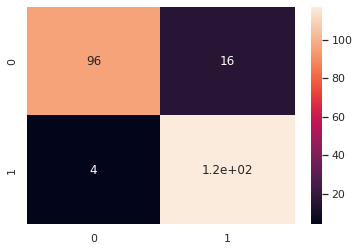

In [139]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

### Model buidling:

In [141]:
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#LogisticRegression12
LogisticRegression12 = LogisticRegression(penalty='l2')
LogisticRegression12.fit(X_train, y_train)
y_pred_LogisticRegression12 = LogisticRegression12.predict(X_test)

#LinearDiscriminantAnalysis
LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis.fit(X_train, y_train)
y_pred_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis.predict(X_test)

#KNeighborsClassifier5
KNeighborsClassifier5 = KNeighborsClassifier(5)
KNeighborsClassifier5.fit(X_train, y_train)
y_pred_KNeighborsClassifier5 = KNeighborsClassifier5.predict(X_test)

#KNeighborsClassifier7
KNeighborsClassifier7 = KNeighborsClassifier(7)
KNeighborsClassifier7.fit(X_train, y_train)
y_pred_KNeighborsClassifier7 = KNeighborsClassifier7.predict(X_test)

#KNeighborsClassifier9
KNeighborsClassifier9 = KNeighborsClassifier(9)
KNeighborsClassifier9.fit(X_train, y_train)
y_pred_KNeighborsClassifier9 = KNeighborsClassifier9.predict(X_test)

#KNeighborsClassifier11
KNeighborsClassifier11 = KNeighborsClassifier(11)
KNeighborsClassifier11.fit(X_train, y_train)
y_pred_KNeighborsClassifier11 = KNeighborsClassifier11.predict(X_test)

#DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier.predict(X_test)

#DecisionTreeClassifier
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)
y_pred_GaussianNB = GaussianNB.predict(X_test)

#SVM_Linear
SVC_Linear = SVC(kernel='linear',gamma='auto',probability=True)
SVC_Linear.fit(X_train, y_train)
y_pred_SVC_Linear = SVC_Linear.predict(X_test)

#SVC_RBF
SVC_RBF = SVC(kernel='rbf',gamma='auto',probability=True)
SVC_RBF.fit(X_train, y_train)
y_pred_SVC_RBF = SVC_RBF.predict(X_test)

#AdaBoostClassifier
AdaBoostClassifier = AdaBoostClassifier()
AdaBoostClassifier.fit(X_train, y_train)
y_pred_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)

#GradientBoostingClassifier
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
GradientBoostingClassifier.fit(X_train, y_train)
y_pred_GradientBoostingClassifier = GradientBoostingClassifier.predict(X_test)

#RandomForestClassifier_Entropy100
RandomForestClassifier_Entropy100 = RandomForestClassifier(criterion='entropy',n_estimators=100)
RandomForestClassifier_Entropy100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Entropy100 = RandomForestClassifier_Entropy100.predict(X_test)

#RandomForestClassifier_Gini100
RandomForestClassifier_Gini100 = RandomForestClassifier(criterion='gini',n_estimators=100)
RandomForestClassifier_Gini100.fit(X_train, y_train)
y_pred_RandomForestClassifier_Gini100 = RandomForestClassifier_Gini100.predict(X_test)

#ExtraTreesClassifier100
ExtraTreesClassifier100 = ExtraTreesClassifier(n_estimators= 100)
ExtraTreesClassifier100.fit(X_train, y_train)
y_pred_ExtraTreesClassifier100 = ExtraTreesClassifier100.predict(X_test)

#ExtraTreesClassifier500
ExtraTreesClassifier500 = ExtraTreesClassifier(n_estimators= 500)
ExtraTreesClassifier500.fit(X_train, y_train)
y_pred_ExtraTreesClassifier500 = ExtraTreesClassifier500.predict(X_test)

#MLPClassifier
MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_train, y_train)
y_pred_MLPClassifier = MLPClassifier.predict(X_test)

#SGDClassifier1000
SGDClassifier1000 = SGDClassifier(max_iter=1000, tol=1e-4)
SGDClassifier1000.fit(X_train, y_train)
y_pred_SGDClassifier1000 = SGDClassifier1000.predict(X_test)

#XGBClassifier2000
XGBClassifier2000 = xgb.XGBClassifier(n_estimators= 2000)
XGBClassifier2000.fit(X_train, y_train)
y_pred_XGBClassifier2000 = XGBClassifier2000.predict(X_test)

#XGBClassifier500
XGBClassifier500 = xgb.XGBClassifier(n_estimators= 500)
XGBClassifier500.fit(X_train, y_train)
y_pred_XGBClassifier500 = XGBClassifier500.predict(X_test)

#XGBClassifier100
XGBClassifier100 = xgb.XGBClassifier(n_estimators= 100)
XGBClassifier100.fit(X_train, y_train)
y_pred_XGBClassifier100 = XGBClassifier100.predict(X_test)

#XGBClassifier1000
XGBClassifier1000 = xgb.XGBClassifier(n_estimators= 1000)
XGBClassifier1000.fit(X_train, y_train)
y_pred_XGBClassifier1000 = XGBClassifier1000.predict(X_test)

#ExtraTreesClassifier1000
ExtraTreesClassifier1000 = ExtraTreesClassifier(n_estimators= 1000)
ExtraTreesClassifier1000.fit(X_train, y_train)
y_pred_ExtraTreesClassifier1000 = ExtraTreesClassifier1000.predict(X_test)


### Adding Soft Voting Model 

In [142]:
data = {        'LinearDiscriminantAnalysis': y_pred_LinearDiscriminantAnalysis, 
                'KNeighborsClassifier5': y_pred_KNeighborsClassifier5, 
                'KNeighborsClassifier7': y_pred_KNeighborsClassifier7,
                'KNeighborsClassifier9': y_pred_KNeighborsClassifier9, 
                'KNeighborsClassifier11': y_pred_KNeighborsClassifier11, 
                'DecisionTreeClassifier': y_pred_DecisionTreeClassifier,
                'GaussianNB': y_pred_GaussianNB, 
                'SVC_Linear': y_pred_SVC_Linear, 
                'SVC_RBF': y_pred_SVC_RBF,
                'AdaBoostClassifier': y_pred_AdaBoostClassifier,
                'GradientBoostingClassifier': y_pred_GradientBoostingClassifier,
                'RandomForestClassifier_Entropy100': y_pred_RandomForestClassifier_Entropy100,
                'RandomForestClassifier_Gini100': y_pred_RandomForestClassifier_Gini100,
                'ExtraTreesClassifier100': y_pred_ExtraTreesClassifier100,
                'ExtraTreesClassifier500': y_pred_ExtraTreesClassifier500,
                'MLPClassifier': y_pred_MLPClassifier,
                'SGDClassifier1000': y_pred_SGDClassifier1000,
                'XGBClassifier2000': y_pred_XGBClassifier2000,
                'XGBClassifier500': y_pred_XGBClassifier500,
                'XGBClassifier100': y_pred_XGBClassifier100,
                'XGBClassifier1000': y_pred_XGBClassifier1000,
                'ExtraTreesClassifier1000': y_pred_ExtraTreesClassifier1000
        }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
1,LinearDiscriminantAnalysis,0.828326,0.829268,0.842975,0.812500,0.836066,0.827738,5.929476,0.656008
2,KNeighborsClassifier5,0.858369,0.866667,0.859504,0.857143,0.863071,0.858323,4.891813,0.716436
3,KNeighborsClassifier7,0.836910,0.854701,0.826446,0.848214,0.840336,0.837330,5.632992,0.674163
4,KNeighborsClassifier9,0.836910,0.842975,0.842975,0.830357,0.842975,0.836666,5.632999,0.673332
5,KNeighborsClassifier11,0.815451,0.819672,0.826446,0.803571,0.823045,0.815009,6.374184,0.630250
6,DecisionTreeClassifier,0.879828,0.860465,0.917355,0.839286,0.888000,0.878321,4.150644,0.760467
7,GaussianNB,0.819742,0.801527,0.867769,0.767857,0.833333,0.817813,6.225963,0.640129
8,SVC_Linear,0.845494,0.834646,0.876033,0.812500,0.854839,0.844267,5.336535,0.690831
9,SVC_RBF,0.841202,0.838710,0.859504,0.821429,0.848980,0.840466,5.484767,0.681839


In [144]:
model_results_sorted = model_results.sort_values(by=['ROC'],ascending=False)
model_results_sorted.head(10)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
22,ExtraTreesClassifier1000,0.922747,0.887218,0.975207,0.866071,0.929134,0.920639,2.668283,0.849211
14,ExtraTreesClassifier100,0.922747,0.887218,0.975207,0.866071,0.929134,0.920639,2.668283,0.849211
18,XGBClassifier2000,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
15,ExtraTreesClassifier500,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
0,Soft Voting,0.914163,0.879699,0.966942,0.857143,0.921260,0.912043,2.964757,0.831855
12,RandomForestClassifier_Entropy100,0.914163,0.874074,0.975207,0.848214,0.921875,0.911710,2.964760,0.833381
21,XGBClassifier1000,0.909871,0.878788,0.958678,0.857143,0.916996,0.907910,3.112992,0.822524
13,RandomForestClassifier_Gini100,0.909871,0.873134,0.966942,0.848214,0.917647,0.907578,3.112995,0.823897
19,XGBClassifier500,0.896996,0.881890,0.925620,0.866071,0.903226,0.895846,3.557694,0.794333
6,DecisionTreeClassifier,0.879828,0.860465,0.917355,0.839286,0.888000,0.878321,4.150644,0.760467


### Feature important 

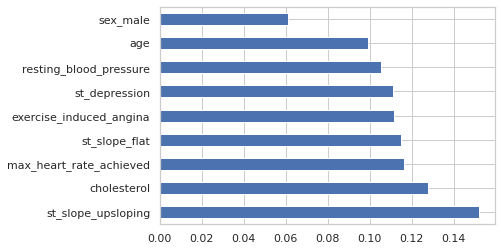

In [147]:
feat_importances = pd.Series(ExtraTreesClassifier1000.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')